<a href="https://colab.research.google.com/github/itsmir24/Car-pricing-Influencers/blob/main/Influence_of_Car_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **The primary focus is to conduct a thorough analysis of the critical factors that impact car pricing within the American market.**

In [57]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data=files.upload()

Saving car-prices_unclean.xlsx to car-prices_unclean.xlsx


#Task 1: Loading and Initial Data Exploration:

In [59]:
#loading the datset
df=pd.read_excel("/content/car-prices_unclean.xlsx")

In [60]:
#Displaying the first five rows
df.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Untitled
0,0,1.0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,1,2.0,3.0,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,2,NaN,NaN,alfa-romero Quadrifoglio,NaN,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,4,NaN,2.0,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


In [61]:
#checking the dimension of the dataset
df.shape

(205, 28)

In [62]:
#Getting a Summary of the Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            164 non-null    float64
 2   symboling         164 non-null    float64
 3   CarName           205 non-null    object 
 4   fueltype          164 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [63]:
#Checking for Missing Values:
#Here, Use the isnull() method to identify missing values in the dataset, followed by sum() to count the missing values for each column.
#This step helps us assess data quality and decide how to handle missing data during our analysis.
df.isnull().sum()

,0
Unnamed: 0,0
car_ID,41
symboling,41
CarName,0
fueltype,41
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0


In [64]:
#Check for Duplicate Values:
df.duplicated().sum()

0

In [65]:
#Count the Number of Unique Values:
df.nunique()

,0
Unnamed: 0,205
car_ID,164
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2


In [66]:
#Obtaining Summary Statistics for Numerical Columns:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
       Unnamed: 0      car_ID   symboling   wheelbase   carlength    carwidth  \
count  205.000000  164.000000  164.000000  205.000000  205.000000  205.000000   
mean   102.000000  105.707317    0.841463   98.756585  174.049268   65.907805   
std     59.322565   59.278792    1.257805    6.021776   12.337289    2.145204   
min      0.000000    1.000000   -2.000000   86.600000  141.100000   60.300000   
25%     51.000000   57.750000    0.000000   94.500000  166.300000   64.100000   
50%    102.000000  105.500000    1.000000   97.000000  173.200000   65.500000   
75%    153.000000  159.250000    2.000000  102.400000  183.100000   66.900000   
max    204.000000  205.000000    3.000000  120.900000  208.100000   72.300000   

        carheight   curbweight  enginesize   boreratio      stroke  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean    53.724878  2555.565854  126.907317    3.329756    3.255415   
std      2.443522

#Task 02: Handling Missing values and Outliers:

Further after Analysing, We find that car_ID is nothing but a range of numbers from 1-205 this doesn't impact the price of the car and we have columns named Untitled and Unnamed: 0 which have only null values. Hence,We begin by removing unnecessary columns from our dataset.

**In this case, we've decided to drop the 'car_ID', ‘Unnamed: 0’ and 'Untitled' columns as they do not contribute significantly to our analysis.**

In [67]:
#Dropping Unwanted Columns:
df.drop(['car_ID', 'Untitled','Unnamed: 0'], axis = 1, inplace = True)

In [68]:
#check the remaining coulmns
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Next, we address missing values in our dataset. Missing values can impact the accuracy of our analysis, so we take the following steps:
For the 'symboling' column, we fill missing values with the mean of the column.

 **For the 'price' column, we fill missing values with the median.
For the 'fueltype' column, we fill missing values with the most frequent value (mode).**

In [69]:
#Handling Missing values:
df['symboling'].fillna(df['symboling'].mean(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

most_frequent_fueltype = df['fueltype'].mode()[0]
df['fueltype'].fillna(most_frequent_fueltype, inplace=True)

<ipython-input-69-59e3f3f30310>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['symboling'].fillna(df['symboling'].mean(), inplace=True)
<ipython-input-69-59e3f3f30310>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [70]:
#Re-Checking for Missing Values: check to ensure that no missing values remain in our dataset.
print(df.isnull().sum())

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


To detect outliers, we calculate quartiles (Q1 and Q3) and the Interquartile Range (IQR) for the 'price' column.

 **Outliers are then identified as values falling below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).**

In [71]:
#Identifying Outliers:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("\nOutliers in price:")
print(outliers)


Outliers in price:
     symboling                   CarName fueltype aspiration doornumber  \
15    0.000000                    bmw x4      gas        std       four   
16    0.000000                    bmw x5      gas        std        two   
17    0.000000                    bmw x3      gas        std       four   
47    0.000000                 jaguar xj      gas        std       four   
48    0.000000                 jaguar xf      gas        std       four   
67   -1.000000  buick electra 225 custom   diesel      turbo       four   
68   -1.000000  buick century luxus (sw)   diesel      turbo       four   
69    0.841463             buick century   diesel      turbo        two   
70   -1.000000             buick skyhawk   diesel      turbo       four   
71   -1.000000   buick opel isuzu deluxe      gas        std       four   
72    3.000000             buick skylark      gas        std        two   
73    0.841463     buick century special      gas        std       four   
126  

To mitigate the impact of outliers on our analysis, we apply a log transformation to the 'price' column.

**Logarithmic transformations are a common technique to make data more normally distributed and reduce the influence of extreme values.**

<Axes: xlabel='price', ylabel='Count'>

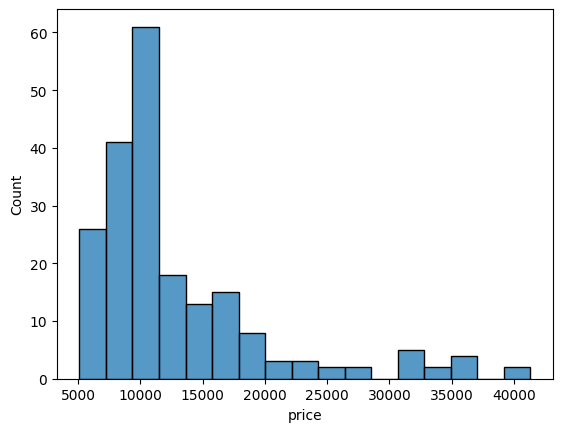

In [72]:
sns.histplot(x='price',data=df)

In [73]:
#Applying a Log Transformation to Handle Outliers:
df['price'] = np.log1p(df['price'])

<Axes: xlabel='price', ylabel='Count'>

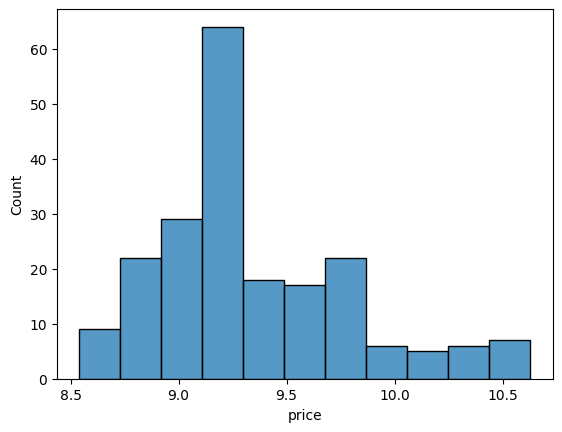

In [74]:
sns.histplot(x='price',data=df)

#Task 03: Data Cleaning and Preparation

As part of our data preprocessing efforts , we recognize the importance of refining the dataset to ensure data quality and consistency.

 *In this task, we focus on the 'CarName' column.we will extract and store the car manufacturers' names in a new column called 'car_company.'*

**This transformation will enable us to analyze and group data more effectively based on manufacturers. This process is essential for maintaining uniformity in our dataset and facilitating subsequent analysis.**

In [75]:
#Display the 'CarName' Column Content:
print(df['CarName'].head(25))

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object


In [76]:
#Extract Car Companies/brand from 'CarName'
car_companies = pd.Series([car.split(" ")[0] for car in df['CarName']], index = df.index)
#Display Modified 'CarName' Column stored in 'car_companies’ variable:
print(car_companies.head(25))
print("-"*50)
#Drop 'CarName' Column:
df.drop(columns= ['CarName'], axis = 1, inplace = True)
#Create a New 'car_company' Column: storing the standardized car manufacturer names extracted earlier.
df['car_company'] = car_companies
#Count the Number of Cars Sold by Each Manufacturer:
print(df['car_company'].value_counts())
#Replace Misspelt 'car_company' Names:
df.loc[(df['car_company'] == "vw") | (df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'
df.loc[df['car_company'] == "porcshce", 'car_company'] = 'porsche'
df.loc[df['car_company'] == "toyouta", 'car_company'] = 'toyota'
df.loc[df['car_company'] == "Nissan", 'car_company'] = 'nissan'
df.loc[df['car_company'] == "maxda", 'car_company'] = 'mazda'
print(df['car_company'].value_counts())

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object
--------------------------------------------------
car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercu

#Task 04: Feature Engineering

we will uncover correlations and relationships of all the numerical columns with the price of cars.

In [77]:
#Select Numerical Columns for Analysis (Excluding 'Price' Column):
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

#Calculate Correlation Coefficients Using Pandas' .corr() Function:
correlation_matrix = numerical_columns.corr()

#Print the Correlation Coefficients with 'Price':
price_correlations = correlation_matrix['price']

print("Correlation coefficients with 'price' ")
print(price_correlations)

#Identify Numerical Factors with Significant Impact on Car Prices:
significant_factors = price_correlations[abs(price_correlations) > 0.5]

print("\nFactors with significant impact on car prices:")
print(significant_factors)


Correlation coefficients with 'price' 
symboling          -0.022127
wheelbase           0.553529
carlength           0.683837
carwidth            0.702964
carheight           0.158797
curbweight          0.785020
enginesize          0.708287
boreratio           0.515868
stroke              0.116368
compressionratio    0.079953
horsepower          0.718771
peakrpm            -0.081336
citympg            -0.681929
highwaympg         -0.675603
price               1.000000
Name: price, dtype: float64

Factors with significant impact on car prices:
wheelbase     0.553529
carlength     0.683837
carwidth      0.702964
curbweight    0.785020
enginesize    0.708287
boreratio     0.515868
horsepower    0.718771
citympg      -0.681929
highwaympg   -0.675603
price         1.000000
Name: price, dtype: float64


we've successfully uncovered the Numerical factors that wield substantial influence over car prices in the American market. These insights will guide our subsequent analysis and model development, steering us toward a predictive pricing model that aligns with our ultimate goal

 *Now, we turn our attention to the categorical variables present in our dataset. These variables encapsulate essential attributes, such as the type of fuel, aspiration, car body style, and drivetrain, which can significantly impact the pricing of cars.*

#Task 05: Identifying Categorical Factors Impacting Car Prices

In [78]:
#Select Categorical Columns for Analysis:
categorical_columns = df.select_dtypes(include=['object'])
#Iterate Through Each Categorical Column and Analyze Impact for Each Category by the descriptive statistics:

for column in categorical_columns:
    print(f"Impact of '{column}' on 'price':")
    unique_categories = df[column].unique()
    for category in unique_categories:
        category_data = df[df[column] == category]
        price_summary = category_data['price'].describe()
        print(f"Category: {category}")
        print(price_summary)
    print('-'*50)

Impact of 'fueltype' on 'price':
Category: gas
count    191.000000
mean       9.337526
std        0.441184
min        8.540714
25%        9.067428
50%        9.287209
75%        9.539529
max       10.629005
Name: price, dtype: float64
Category: diesel
count    14.000000
mean      9.640715
std       0.541325
min       8.867850
25%       9.061825
50%       9.765265
75%      10.116378
max      10.360944
Name: price, dtype: float64
--------------------------------------------------
Impact of 'aspiration' on 'price':
Category: std
count    168.000000
mean       9.307534
std        0.452817
min        8.540714
25%        9.004801
50%        9.287209
75%        9.505690
max       10.629005
Name: price, dtype: float64
Category: turbo
count    37.000000
mean      9.588426
std       0.385723
min       8.947676
25%       9.287209
50%       9.536834
75%       9.832045
max      10.360944
Name: price, dtype: float64
--------------------------------------------------
Impact of 'doornumber' on 'price'

In [79]:
from scipy import stats

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # Perform ANOVA test
    groups = [df['price'][df[column] == category] for category in df[column].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA for {column}: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA for fueltype: F-statistic = 5.967023792260164, p-value = 0.015431046057241682
ANOVA for aspiration: F-statistic = 12.26466658889055, p-value = 0.0005676141613624314
ANOVA for doornumber: F-statistic = 2.1394605462175433, p-value = 0.145098852767064
ANOVA for carbody: F-statistic = 6.7911500603744575, p-value = 3.814835822762655e-05
ANOVA for drivewheel: F-statistic = 61.45493687329072, p-value = 1.4204778453186298e-21
ANOVA for enginelocation: F-statistic = 19.13066669233451, p-value = 1.9500077032005005e-05
ANOVA for enginetype: F-statistic = 5.6633147832659505, p-value = 1.8861953492787754e-05
ANOVA for cylindernumber: F-statistic = 32.40929524689472, p-value = 4.861461742267479e-27
ANOVA for fuelsystem: F-statistic = 17.418150029521335, p-value = 7.016998001776746e-18
ANOVA for car_company: F-statistic = 14.979677106599821, p-value = 1.564367857963274e-29


In [80]:
df.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,0.841463,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510149,alfa-romero
1,3.000000,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711176,alfa-romero
2,0.841463,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711176,alfa-romero
3,2.000000,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543306,audi
4,2.000000,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767152,audi
5,2.000000,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,9.632400,audi
6,1.000000,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,9.781941,audi
7,1.000000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,9.848028,audi
8,1.000000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.3,140,5500,17,20,10.080629,audi
9,0.000000,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.0,160,5500,16,22,9.790328,audi


If the p-value is small (typically < 0.05), it indicates that there is a significant difference between the means of the categories for that categorical variable with respect to price.

#Summary of Key Findings:

Statistically Significant Variables (p-value < 0.05):

**fueltype, aspiration, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem, car_company**
These variables have a significant effect on the price, meaning that different categories within these variables are associated with significantly different average prices.
Non-Significant Variable (p-value > 0.05):

**doornumber:** There is no statistically significant difference in price based on the number of doors, suggesting that it doesn't substantially affect the car price.

**These insights could be useful for predictive modeling or business decisions, such as understanding which features or attributes of cars drive pricing in the market.**